### Exloración de datos 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/siniestros-bdd.csv', encoding='utf-8', sep=';')
data.columns

Index(['MES', 'DIA', 'HORA', 'PROVINCIA', 'CANTON', 'ZONA', 'NUM_FALLECIDO',
       'NUM_LESIONADO', 'TOTAL_VICTIMAS', 'CLASE', 'CAUSA'],
      dtype='object')

In [3]:
data.shape

(24595, 11)

In [4]:
data.head()

,MES,DIA,HORA,PROVINCIA,CANTON,ZONA,NUM_FALLECIDO,NUM_LESIONADO,TOTAL_VICTIMAS,CLASE,CAUSA
0,1,2,11,10,1004,1,0,0,0,7,4
1,1,2,23,10,1001,2,0,0,0,8,10
2,1,2,12,18,1801,1,0,3,3,3,7
3,1,2,7,18,1801,2,0,1,1,1,1
4,1,2,4,17,1701,1,0,0,0,4,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24595 entries, 0 to 24594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   MES             24595 non-null  int64
 1   DIA             24595 non-null  int64
 2   HORA            24595 non-null  int64
 3   PROVINCIA       24595 non-null  int64
 4   CANTON          24595 non-null  int64
 5   ZONA            24595 non-null  int64
 6   NUM_FALLECIDO   24595 non-null  int64
 7   NUM_LESIONADO   24595 non-null  int64
 8   TOTAL_VICTIMAS  24595 non-null  int64
 9   CLASE           24595 non-null  int64
 10  CAUSA           24595 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [6]:
data.isnull().sum()

MES               0
DIA               0
HORA              0
PROVINCIA         0
CANTON            0
ZONA              0
NUM_FALLECIDO     0
NUM_LESIONADO     0
TOTAL_VICTIMAS    0
CLASE             0
CAUSA             0
dtype: int64

In [7]:
data.duplicated().sum()

818

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(23777, 11)

In [9]:
for col in data.columns:
    print(f"{col}: {data[col].value_counts().count()}")

MES: 12
DIA: 7
HORA: 24
PROVINCIA: 24
CANTON: 172
ZONA: 2
NUM_FALLECIDO: 8
NUM_LESIONADO: 22
TOTAL_VICTIMAS: 23
CLASE: 8
CAUSA: 10


In [10]:
data = data.drop(columns=['CANTON', 'MES'])

In [11]:
categories = ['DIA', 'HORA', 'PROVINCIA', 'ZONA', 'CLASE', 'CAUSA']
for cat in categories:
    data[cat] = data[cat].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23777 entries, 0 to 24594
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   DIA             23777 non-null  category
 1   HORA            23777 non-null  category
 2   PROVINCIA       23777 non-null  category
 3   ZONA            23777 non-null  category
 4   NUM_FALLECIDO   23777 non-null  int64   
 5   NUM_LESIONADO   23777 non-null  int64   
 6   TOTAL_VICTIMAS  23777 non-null  int64   
 7   CLASE           23777 non-null  category
 8   CAUSA           23777 non-null  category
dtypes: category(6), int64(3)
memory usage: 885.0 KB


## Visualización de datos

### Mapeo de etiquetas

In [12]:
clase_siniestro_dict = {
    1: 'Atropellos',
    2: 'Caída de pasajero',
    3: 'Choques',
    4: 'Estrellamientos',
    5: 'Rozamientos',
    6: 'Volcamientos',
    7: 'Pérdida de pista',
    8: 'Otros'
}

clase_siniestro_mapped = data['CLASE'].map(clase_siniestro_dict )
clase_siniestro_mapped.value_counts()

CLASE
Choques              10981
Atropellos            3811
Estrellamientos       3100
Pérdida de pista      2997
Rozamientos           1220
Caída de pasajero      696
Otros                  558
Volcamientos           414
Name: count, dtype: int64

In [13]:
causa_siniestro_dict = {1:"EMBRIAGUEZ O DROGA",
2:"MAL REBASAMIENTO INVADIR CARRIL",
3:"EXCESO VELOCIDAD",
4:"IMPERICIA E IMPRUDENCIA DEL CONDUCTOR",
5:"IMPRUDENCIA  DEL PEATÓN",
6:"DAÑOS MECÁNICOS",
7:"NO RESPETA LAS SEÑALES DE TRÁNSITO",
8:"FACTORES CLIMÁTICOS",
9:"MAL ESTADO DE LA VÍA",
10:"OTRAS CAUSAS"}

causa_siniestro_mapped = data['CAUSA'].map(causa_siniestro_dict)
causa_siniestro_mapped.value_counts()

CAUSA
IMPERICIA E IMPRUDENCIA DEL CONDUCTOR    11575
EXCESO VELOCIDAD                          3680
NO RESPETA LAS SEÑALES DE TRÁNSITO        2979
EMBRIAGUEZ O DROGA                        1776
MAL REBASAMIENTO INVADIR CARRIL           1724
IMPRUDENCIA  DEL PEATÓN                   1229
FACTORES CLIMÁTICOS                        230
MAL ESTADO DE LA VÍA                       220
OTRAS CAUSAS                               194
DAÑOS MECÁNICOS                            170
Name: count, dtype: int64

In [14]:
data_labels = data.assign(CLASE_LABEL=clase_siniestro_mapped, CAUSA_LABEL=causa_siniestro_mapped)
data_labels.head()

,DIA,HORA,PROVINCIA,ZONA,NUM_FALLECIDO,NUM_LESIONADO,TOTAL_VICTIMAS,CLASE,CAUSA,CLASE_LABEL,CAUSA_LABEL
0,2,11,10,1,0,0,0,7,4,Pérdida de pista,IMPERICIA E IMPRUDENCIA DEL CONDUCTOR
1,2,23,10,2,0,0,0,8,10,Otros,OTRAS CAUSAS
2,2,12,18,1,0,3,3,3,7,Choques,NO RESPETA LAS SEÑALES DE TRÁNSITO
3,2,7,18,2,0,1,1,1,1,Atropellos,EMBRIAGUEZ O DROGA
4,2,4,17,1,0,0,0,4,3,Estrellamientos,EXCESO VELOCIDAD


### Visualización

[Text(0, 0, '10325'),
 Text(0, 0, '9127'),
 Text(0, 0, '2953'),
 Text(0, 0, '808'),
 Text(0, 0, '285'),
 Text(0, 0, '127'),
 Text(0, 0, '67'),
 Text(0, 0, '23'),
 Text(0, 0, '21'),
 Text(0, 0, '8'),
 Text(0, 0, '7'),
 Text(0, 0, '5')]

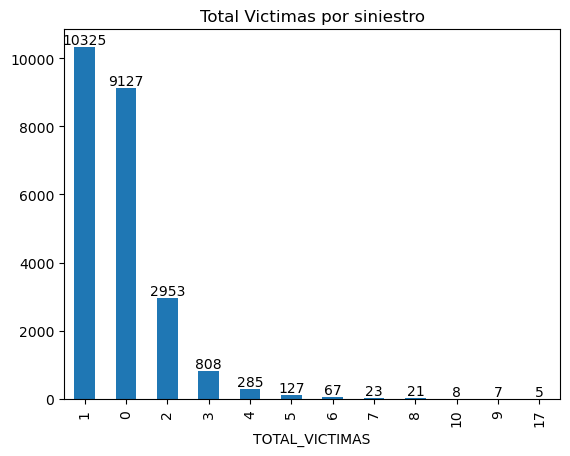

In [15]:
total_vict_data = data_labels["TOTAL_VICTIMAS"].value_counts().sort_index()
fig = total_vict_data.sort_values(ascending=False).head(12).plot(kind='bar')

plt.title('Total Victimas por siniestro')
plt.bar_label(fig.containers[0])

[Text(0, 0, '21810'),
 Text(0, 0, '1810'),
 Text(0, 0, '127'),
 Text(0, 0, '18'),
 Text(0, 0, '5'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

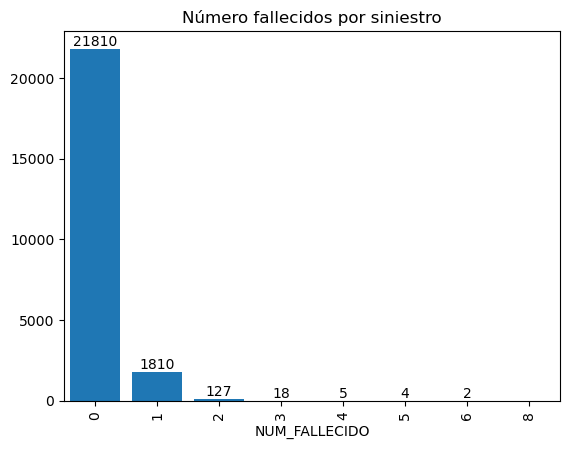

In [16]:
fallecidos_data = data_labels["NUM_FALLECIDO"].value_counts().sort_index()
fallecidos_data.sort_values(ascending=False).head(12).plot(kind='bar')

plt.title('Número fallecidos por siniestro')
plt.bar_label(plt.bar(fallecidos_data.index, fallecidos_data.values))

[Text(0, 0, '1410'),
 Text(0, 0, '1255'),
 Text(0, 0, '1200'),
 Text(0, 0, '1180'),
 Text(0, 0, '1180'),
 Text(0, 0, '1175'),
 Text(0, 0, '1153'),
 Text(0, 0, '1080')]

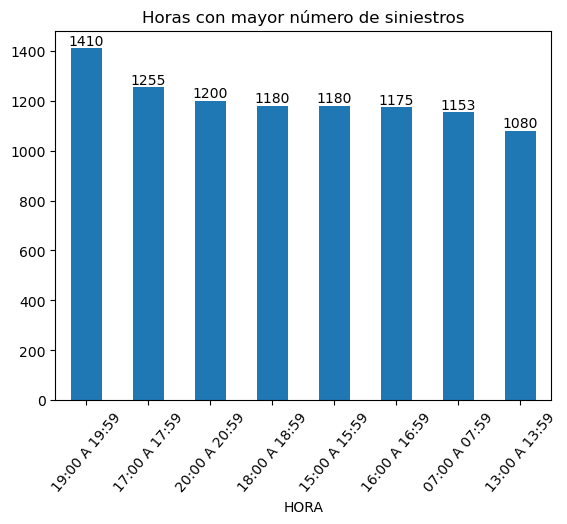

In [17]:
horas = {
    0: "00:00 A 00:59",
    1: "01:00 A 01:59",
    2: "02:00 A 02:59",
    3: "03:00 A 03:59",
    4: "04:00 A 04:59",
    5: "05:00 A 05:59",
    6: "06:00 A 06:59",
    7: "07:00 A 07:59",
    8: "08:00 A 08:59",
    9: "09:00 A 09:59",
    10: "10:00 A 10:59",
    11: "11:00 A 11:59",
    12: "12:00 A 12:59",
    13: "13:00 A 13:59",
    14: "14:00 A 14:59",
    15: "15:00 A 15:59",
    16: "16:00 A 16:59",
    17: "17:00 A 17:59",
    18: "18:00 A 18:59",
    19: "19:00 A 19:59",
    20: "20:00 A 20:59",
    21: "21:00 A 21:59",
    22: "22:00 A 22:59",
    23: "23:00 A 23:59"
}

horas_data = data_labels["HORA"].value_counts().sort_index()
horas_data.index = horas_data.index.map(horas)

fig = horas_data.sort_values(ascending=False).head(8).plot(kind='bar')

plt.title('Horas con mayor número de siniestros')
plt.xticks(rotation=50)
plt.bar_label(fig.containers[0],label_type='edge')

Text(0.5, 1.0, 'Total de victimas por siniestro')

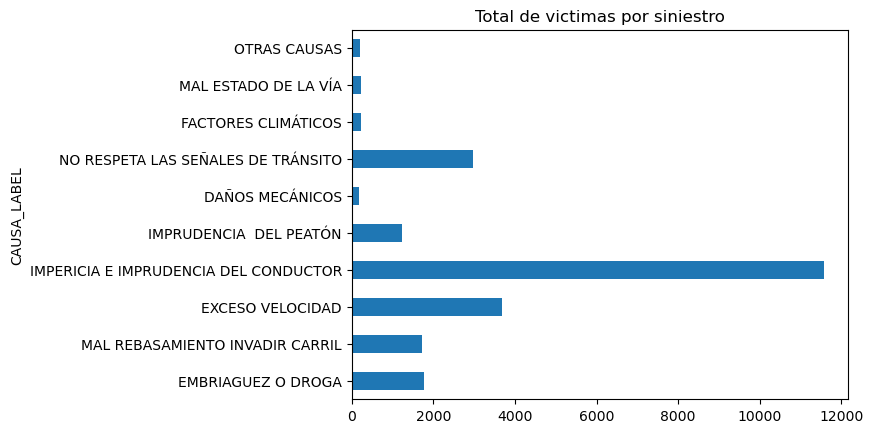

In [18]:
data_labels["CAUSA_LABEL"].value_counts().sort_index().plot(kind='barh')

plt.title('Total de victimas por siniestro')


Text(0.5, 1.0, 'Siniestros por día')

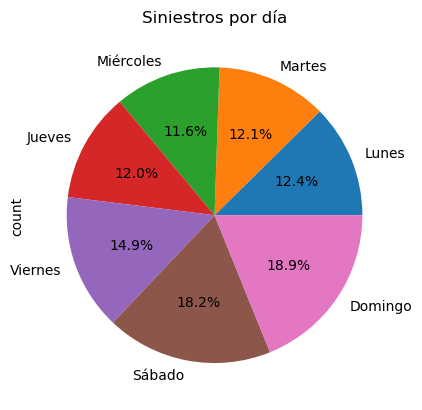

In [19]:
dia_percent = data_labels['DIA'].value_counts().sort_index()
dia_percent = round(dia_percent / dia_percent.sum() * 100,2)
dia_percent.plot(kind='pie', labels = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"], autopct='%1.1f%%')

plt.title('Siniestros por día')

C:\Users\luisc\AppData\Local\Temp\ipykernel_2812\273372520.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clase_zona = data_labels.groupby(['CLASE_LABEL', 'ZONA']).size().unstack()


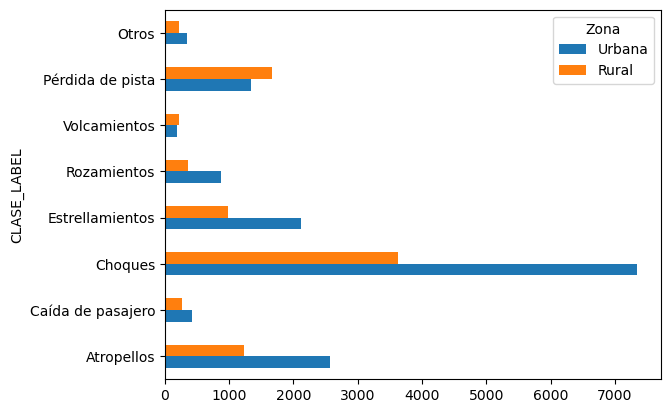

In [20]:
clase_zona = data_labels.groupby(['CLASE_LABEL', 'ZONA']).size().unstack()

clase_zona.plot(kind='barh')
plt.legend(title='Zona', labels = ["Urbana", "Rural"])


## Preparación de datos

In [21]:
data_prep = pd.read_csv('data/siniestros-bdd.csv', encoding='utf-8', sep=';')
data_prep.columns

Index(['MES', 'DIA', 'HORA', 'PROVINCIA', 'CANTON', 'ZONA', 'NUM_FALLECIDO',
       'NUM_LESIONADO', 'TOTAL_VICTIMAS', 'CLASE', 'CAUSA'],
      dtype='object')

In [22]:
data_prep.shape

(24595, 11)

In [23]:
data_prep.isnull().sum()

MES               0
DIA               0
HORA              0
PROVINCIA         0
CANTON            0
ZONA              0
NUM_FALLECIDO     0
NUM_LESIONADO     0
TOTAL_VICTIMAS    0
CLASE             0
CAUSA             0
dtype: int64

In [24]:
data_prep.duplicated().sum()

818

In [25]:
data_prep.drop_duplicates(inplace=True)
data_prep.shape

(23777, 11)

In [26]:
data_prep = data_prep.drop(columns=['CANTON', 'MES', "TOTAL_VICTIMAS"])

In [27]:
categories = ['PROVINCIA', 'ZONA', 'CLASE', 'CAUSA']
for cat in categories:
    data_prep[cat] = data_prep[cat].astype('category')
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23777 entries, 0 to 24594
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   DIA            23777 non-null  int64   
 1   HORA           23777 non-null  int64   
 2   PROVINCIA      23777 non-null  category
 3   ZONA           23777 non-null  category
 4   NUM_FALLECIDO  23777 non-null  int64   
 5   NUM_LESIONADO  23777 non-null  int64   
 6   CLASE          23777 non-null  category
 7   CAUSA          23777 non-null  category
dtypes: category(4), int64(4)
memory usage: 1023.2 KB


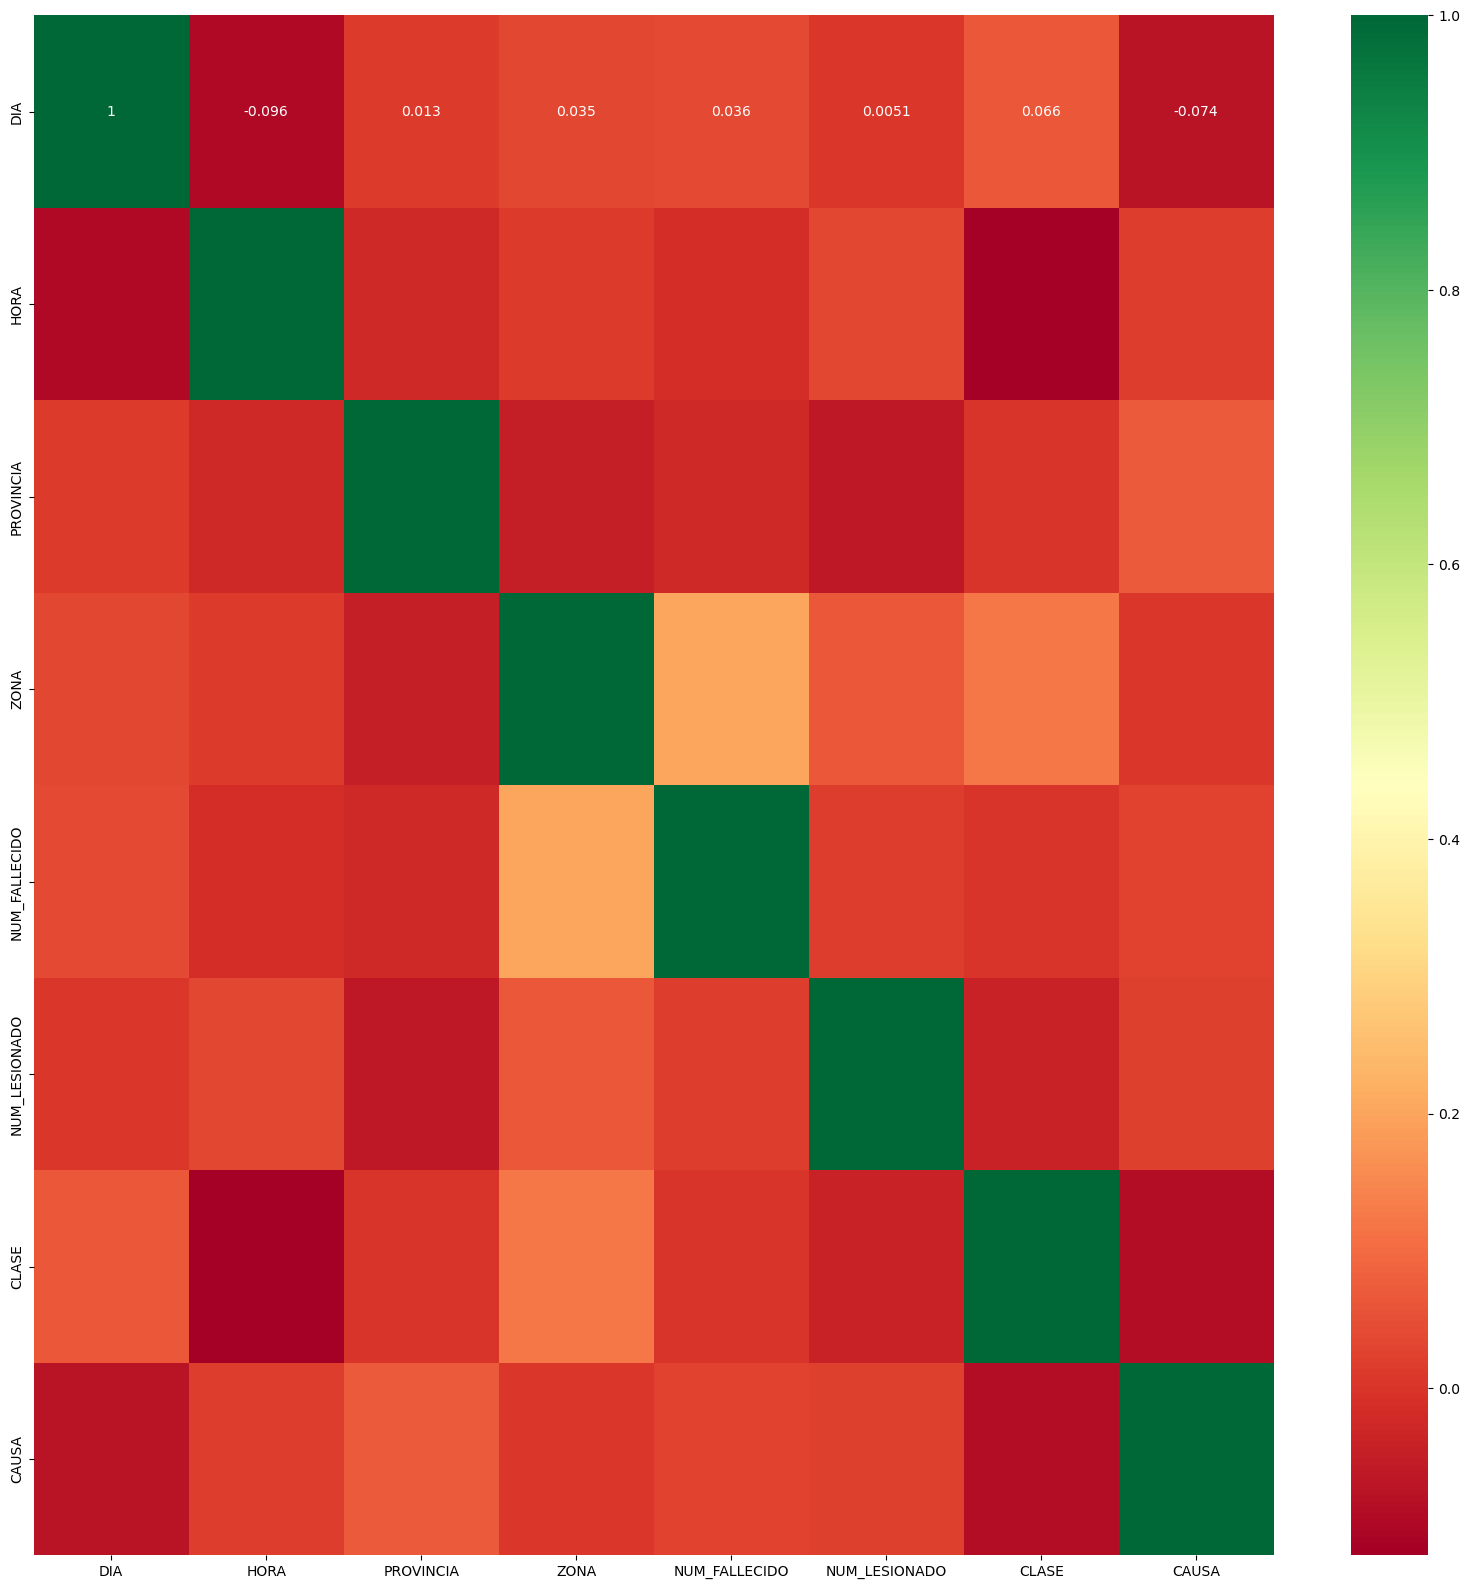

In [28]:
import seaborn as sns
corrmat = data_prep.corr(method='pearson')
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

g=sns.heatmap(data_prep[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## TRASNFORMACIÓN

In [29]:
categorical_data = data_prep.select_dtypes(include='category')
transform_cat_data = pd.get_dummies(categorical_data, columns= categories, drop_first=False, dtype=int)
print(transform_cat_data.shape)
transform_cat_data.head()

(23777, 44)


,PROVINCIA_1,PROVINCIA_2,PROVINCIA_3,PROVINCIA_4,PROVINCIA_5,PROVINCIA_6,PROVINCIA_7,PROVINCIA_8,PROVINCIA_9,PROVINCIA_10,...,CAUSA_1,CAUSA_2,CAUSA_3,CAUSA_4,CAUSA_5,CAUSA_6,CAUSA_7,CAUSA_8,CAUSA_9,CAUSA_10
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_data = data_prep[['NUM_FALLECIDO', 'NUM_LESIONADO']]
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled

array([[-0.27719525, -0.74141548],
       [-0.27719525, -0.74141548],
       [-0.27719525,  1.96111952],
       ...,
       [-0.27719525, -0.74141548],
       [-0.27719525,  0.15942952],
       [ 2.74891657,  0.15942952]])

In [31]:
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns)
numerical_data_scaled.shape

(23777, 2)

In [32]:
numerical_data_scaled.reset_index(drop=True, inplace=True)
transform_cat_data.reset_index(drop=True, inplace=True)
data_unified = numerical_data_scaled.join(transform_cat_data)
data_unified.head()

,NUM_FALLECIDO,NUM_LESIONADO,PROVINCIA_1,PROVINCIA_2,PROVINCIA_3,PROVINCIA_4,PROVINCIA_5,PROVINCIA_6,PROVINCIA_7,PROVINCIA_8,...,CAUSA_1,CAUSA_2,CAUSA_3,CAUSA_4,CAUSA_5,CAUSA_6,CAUSA_7,CAUSA_8,CAUSA_9,CAUSA_10
0,-0.277195,-0.741415,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.277195,-0.741415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.277195,1.961120,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.277195,0.159430,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.277195,-0.741415,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
data_unified.describe()

,NUM_FALLECIDO,NUM_LESIONADO,PROVINCIA_1,PROVINCIA_2,PROVINCIA_3,PROVINCIA_4,PROVINCIA_5,PROVINCIA_6,PROVINCIA_7,PROVINCIA_8,...,CAUSA_1,CAUSA_2,CAUSA_3,CAUSA_4,CAUSA_5,CAUSA_6,CAUSA_7,CAUSA_8,CAUSA_9,CAUSA_10
count,2.377700e+04,2.377700e+04,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,...,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000,23777.000000
mean,3.227431e-17,-8.367412e-17,0.052193,0.005636,0.003365,0.003659,0.005089,0.024141,0.021702,0.007991,...,0.074694,0.072507,0.154771,0.486815,0.051689,0.007150,0.125289,0.009673,0.009253,0.008159
std,1.000021e+00,1.000021e+00,0.222421,0.074861,0.057909,0.060380,0.071157,0.153490,0.145711,0.089036,...,0.262903,0.259331,0.361694,0.499837,0.221402,0.084255,0.331053,0.097878,0.095747,0.089961
min,-2.771953e-01,-7.414155e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.771953e-01,-7.414155e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.771953e-01,1.594295e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.771953e-01,1.594295e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.393170e+01,3.078816e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
data_unified.shape

(23777, 46)

In [35]:
data_unified.dropna(inplace=True)
data_unified.shape

(23777, 46)

In [36]:
data_unified.drop_duplicates(inplace=True)
data_unified.shape

(3023, 46)

El dataset final se denomina **siniestros-bdd-transform**.


In [37]:
data_unified.to_csv('data/siniestros-bdd-transform.csv', index=False)